In [3]:
import os
os.chdir('../..')
!ls

future_trade


In [4]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 500)

In [ ]:
regions = pd.read_csv('../../OPSIS/Data/Country_group/regions.csv')
regions.loc[regions['Region Name']=='Americas', 'Region Name'] = regions.loc[regions['Region Name']=='Americas']['Sub-region Name']
regions.loc[regions['Abbreviation']=='NOR', 'Region Name'] = 'Europe'
regions.loc[regions['Abbreviation']=='OAO', 'Region Name'] = 'Africa'
regions.loc[regions['Abbreviation']=='OIO', 'Region Name'] = 'Africa'
regions = regions[['Abbreviation', 'Region Name']].drop_duplicates()                                                                                       'Northern America', 'Europe']))]
regions.shape

(158, 2)

In [95]:
crop_code = 'jwhea' 
SSP = 'SSP2'
data_dir = '../../OPSIS/Data/Trade_clearance_model'
calibration_output = f'{data_dir}/Output/Calibration/'
model_output = f'{data_dir}/Output/Trade_allocation_future/'

In [122]:
### Scenarios ###
scen_diet = ['BMK', 'FLX', 'PSC', 'VEG', 'VGN'] # 
scen_cal = ['2500kcal']
scen_clim = ['2.6', '7'] # 
scen_lib = ['low', 'high']

scen_list = list(itertools.product(*[scen_diet, scen_cal, scen_clim, scen_lib]))

country_output_all = []
trade_output_all = []

for scen in scen_list:
    country_output = pd.read_csv(f'{model_output}Country_output/country_output_{SSP}_{scen[0]}_{scen[1]}_{scen[2]}_{scen[3]}_{crop_code}.csv')
    trade_output = pd.read_csv(f'{model_output}Trade_output/trade_output_{SSP}_{scen[0]}_{scen[1]}_{scen[2]}_{scen[3]}_{crop_code}.csv')
    country_output_all.append(country_output)
    trade_output_all.append(trade_output)

country_output_all = pd.concat(country_output_all, axis=0, ignore_index=True)
trade_output_all = pd.concat(trade_output_all, axis=0, ignore_index=True)

In [123]:
country_input = pd.read_csv(f'../../OPSIS/Data/Trade_clearance_model/Input/Country_data/country_information_{crop_code}.csv')
trade_input = pd.read_csv(f'../../OPSIS/Data/Trade_clearance_model/Input/Trade_cost/bilateral_trade_cost_{crop_code}.csv')

supply_scn = pd.read_csv(f'../../OPSIS/Data/Trade_clearance_model/Input/Future_scenarios/SSP2/supply_scn/IMPACT_future_supply_{crop_code}.csv')
demand_scn = pd.read_csv(f'../../OPSIS/Data/Trade_clearance_model/Input/Future_scenarios/SSP2/demand_scn/IMPACT_future_demand_{crop_code}.csv')

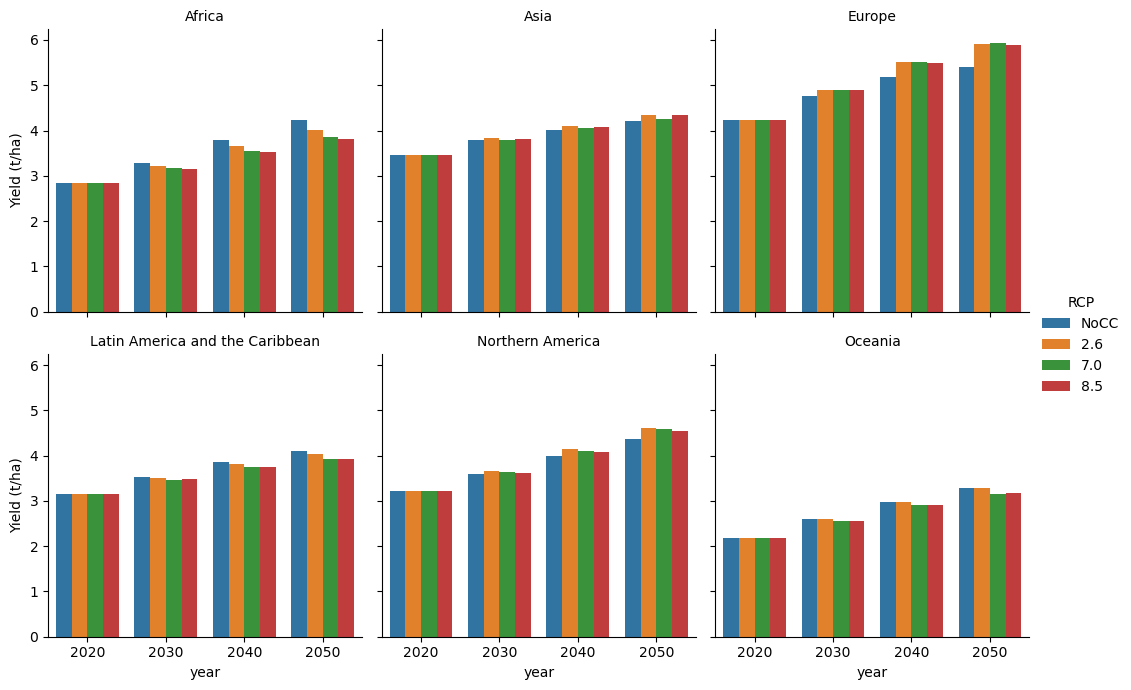

In [170]:
yields = supply_scn.merge(country_input[['abbreviation', 'yield_t_ha', 'supply_q']])
yields['yield_t_ha'] = yields['yield_t_ha'] * yields['scaling_factor_yield']
yields['supply_q'] = yields['supply_q'] * yields['scaling_factor_supply']

yields['area'] = yields['supply_q'] / yields['yield_t_ha']
yields = yields.merge(regions.rename(columns={'Abbreviation': 'abbreviation'}))
yields = yields.groupby(['Region Name', 'RCP', 'year'])[['supply_q', 'area']].sum().reset_index()
yields['Yield (t/ha)'] = yields['supply_q'] / yields['area']
yields['RCP'] = yields['RCP'].astype(str)

g = sns.catplot(x='year', y='Yield (t/ha)', hue='RCP', data=(yields[yields['year'].isin([2020, 2030, 2040, 2050])].copy()
           .assign(year=lambda d: d['year'].round().astype(int))), 
            kind='bar', col='Region Name', col_wrap=3, height=3.5,
            hue_order=['NoCC', '2.6', '7.0', '8.5'])

g.set_titles(col_template="{col_name}") 

In [125]:
# df = country_output_all[(country_output_all['kcal_scn']=='2500kcal') 
#     & (country_output_all['RCP'].isin(['NoCC']))
#     & (country_output_all['year'].isin([2020, 2050]))
#     & (country_output_all['diet_scn'].isin(['BMK']))].copy()
# df['dom_share_demand'] = df['dom_supply'] / df['demand']
# df = df.pivot(index=['abbreviation'],columns=['year'], values='dom_share_demand')
# sns.scatterplot(data=df, x=2020, y=2050)

In [126]:
# coy_output_all['diet_scn'].isin(['BMK']))].describe()untry_output_all[(country_output_all['kcal_scn']=='2500kcal') 
#     & (country_output_all['RCP'].isin(['NoCC']))
#     & (country_output_all['year'].isin([2020, 2050]))
#     & (countr

In [127]:
# country_output_all[(country_output_all['kcal_scn']=='2500kcal') 
#     & (country_output_all['RCP'].isin(['NoCC']))
#     & (country_output_all['year'].isin([2020]))
#     & (country_output_all['diet_scn'].isin(['BMK']))].sort_values(by='demand').tail(20)

In [128]:
# country_output_all[(country_output_all['kcal_scn']=='2500kcal') 
#     & (country_output_all['RCP'].isin(['NoCC']))
#     & (country_output_all['year'].isin([2050]))
#     & (country_output_all['diet_scn'].isin(['BMK']))].sort_values(by='demand').tail(20)

In [129]:
# df[(df[2020]<0.10) & (df[2050]>0.9)]

In [130]:
# country_output_all[(country_output_all['kcal_scn']=='2500kcal') 
#     & (country_output_all['RCP'].isin(['NoCC']))
#     & (country_output_all['year'].isin([2020, 2050]))
#     & (country_output_all['diet_scn'].isin(['BMK']))
#     & (country_output_all['abbreviation'].isin(df[(df[2020]<0.10) & (df[2050]>0.9)].reset_index()['abbreviation'].unique()))].pivot(
    #     index=['abbreviation'], columns=['year'], values='demand'
    # )

In [131]:
# global demand
df = country_output_all[(country_output_all['kcal_scn']=='2500kcal') 
    & (country_output_all['year'].isin([2020, 2030, 2040, 2050]))].copy()
df['total_conprice'] = df['conprice'] * df['demand']
df = df.groupby(['year', 'diet_scn', 'RCP', 'lib_scn'])[['supply', 'demand', 'dom_supply', 'import', 'export', 'total_conprice']].sum().reset_index()
df['conprice'] = df['total_conprice'] / df['demand']
df['demand'] = df['demand'] / 1000
df['supply'] = df['supply'] / 1000
df['dom_supply'] = df['dom_supply'] / 1000
df['import'] = df['import'] / 1000
df['export'] = df['export'] / 1000
df['fraction_trade'] = df['import'] / df['demand']

In [132]:
df[df['diet_scn']=='BMK']

,year,diet_scn,RCP,lib_scn,supply,demand,dom_supply,import,export,total_conprice,conprice,fraction_trade
0,2020,BMK,2.6,high,768.825261,768.825261,576.796483,192.028778,192.028778,3.695996e+08,480.732852,0.249769
1,2020,BMK,2.6,low,768.825261,768.825261,576.796483,192.028778,192.028778,3.695996e+08,480.732852,0.249769
2,2020,BMK,7.0,high,768.825261,768.825261,576.796483,192.028778,192.028778,3.695996e+08,480.732852,0.249769
3,2020,BMK,7.0,low,768.825261,768.825261,576.796483,192.028778,192.028778,3.695996e+08,480.732852,0.249769
20,2030,BMK,2.6,high,849.457625,849.457625,545.614412,303.843213,303.843213,3.928508e+08,462.472557,0.357691
21,2030,BMK,2.6,low,832.745966,832.745966,590.676923,242.069044,242.069044,4.099053e+08,492.233248,0.290688
22,2030,BMK,7.0,high,832.872893,832.872893,540.040308,292.832585,292.832585,4.123194e+08,495.056846,0.351593
23,2030,BMK,7.0,low,816.319710,816.319710,581.713972,234.605738,234.605738,4.291274e+08,525.685504,0.287394
40,2040,BMK,2.6,high,893.165239,893.165239,533.688564,359.476675,359.476675,4.170947e+08,466.984891,0.402475
41,2040,BMK,2.6,low,878.238950,878.238950,605.750366,272.488584,272.488584,4.319230e+08,491.805740,0.310267


In [133]:
df_inp = country_input.merge(demand_scn[demand_scn['kcal_scn']=='2500kcal'])
df_inp['demand_q'] = df_inp['demand_q'] * df_inp['scaling_factor_demand']

In [134]:
# df_inp[df_inp['year'].isin([2020, 2030, 2040, 2050])].merge(
#     country_output_all[['abbreviation', 'year', 'diet_scn', 'demand']].rename(columns={'demand': 'demand_modelled'})).groupby(['year', 'diet_scn'])[[
#     'demand_q', 'demand_modelled']].corr().iloc[0::2,-1].reset_index()

In [135]:
df_inp = df_inp[df_inp['year'].isin([2020, 2030, 2040, 2050])].groupby(['diet_scn', 'year'])[['demand_q']].sum().reset_index()
df_inp['demand_q'] = df_inp['demand_q'] / 1e6
df_inp.pivot(index='year', columns='diet_scn', values='demand_q').reset_index()

diet_scn,year,BMK,FLX,FLX_hmilk,FLX_hredmeat,PSC,VEG,VGN
0,2020,768.265018,768.265018,768.265018,768.265018,768.265018,768.265018,768.265018
1,2030,838.380376,853.750245,860.364320,864.018449,885.247127,808.411965,802.479094
2,2040,883.641551,901.475988,914.975540,922.978740,969.996224,803.468382,790.986069
3,2050,930.674989,952.889053,973.731030,986.665017,1060.612992,798.966248,779.615189


In [136]:
df[df['year']==2050][['year', 'RCP', 'diet_scn', 'lib_scn', 'demand']].rename(columns={'demand': 'demand_modelled'}).merge(
    df_inp.rename(columns={'demand_q':'demand_from_scn'}))

,year,RCP,diet_scn,lib_scn,demand_modelled,demand_from_scn
0,2050,2.6,BMK,high,935.008409,930.674989
1,2050,2.6,BMK,low,916.159994,930.674989
2,2050,7.0,BMK,high,886.777016,930.674989
3,2050,7.0,BMK,low,872.278142,930.674989
4,2050,2.6,FLX,high,944.821396,952.889053
5,2050,2.6,FLX,low,926.061565,952.889053
6,2050,7.0,FLX,high,908.032666,952.889053
7,2050,7.0,FLX,low,881.586980,952.889053
8,2050,2.6,PSC,high,1024.115985,1060.612992
9,2050,2.6,PSC,low,1004.906707,1060.612992


Text(575.6950729166666, 0.5, 'Global demand (million Tonnes)')

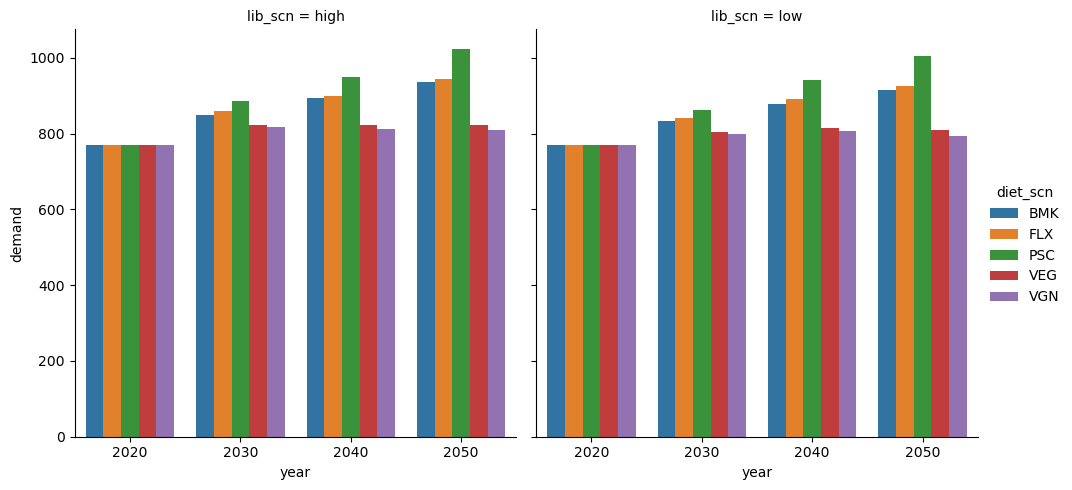

In [137]:
sns.catplot(x='year', y='demand', hue='diet_scn', data=df[df['RCP']==2.6], kind='bar', col='lib_scn',
            hue_order=['BMK', 'FLX', 'PSC', 'VEG', 'VGN']) # 
plt.ylabel('Global demand (million Tonnes)')

Text(568.5435475260416, 0.5, 'Fraction trade over total supply')

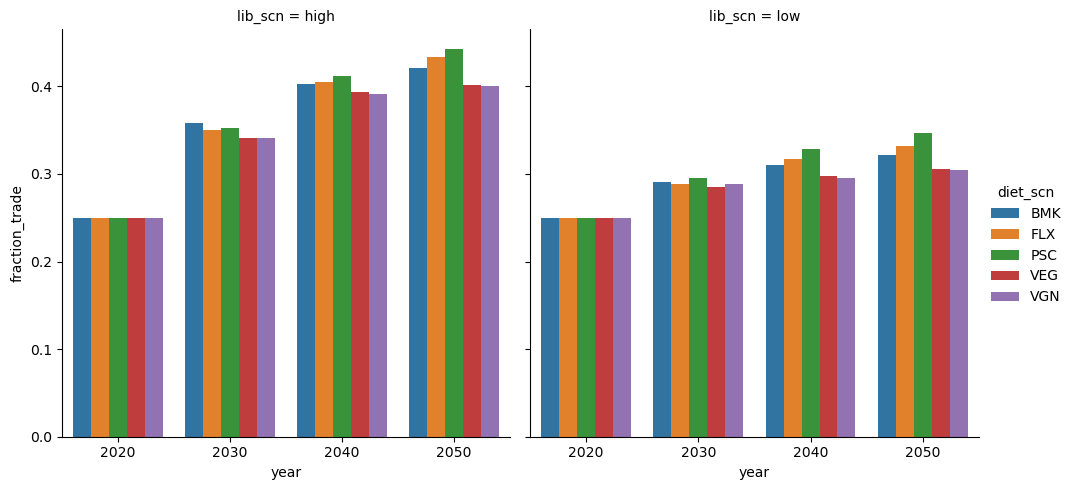

In [138]:
sns.catplot(x='year', y='fraction_trade', hue='diet_scn', data=df[df['RCP']==2.6], kind='bar', col='lib_scn',
            hue_order=['BMK', 'FLX', 'PSC', 'VEG', 'VGN']) # 
plt.ylabel('Fraction trade over total supply')

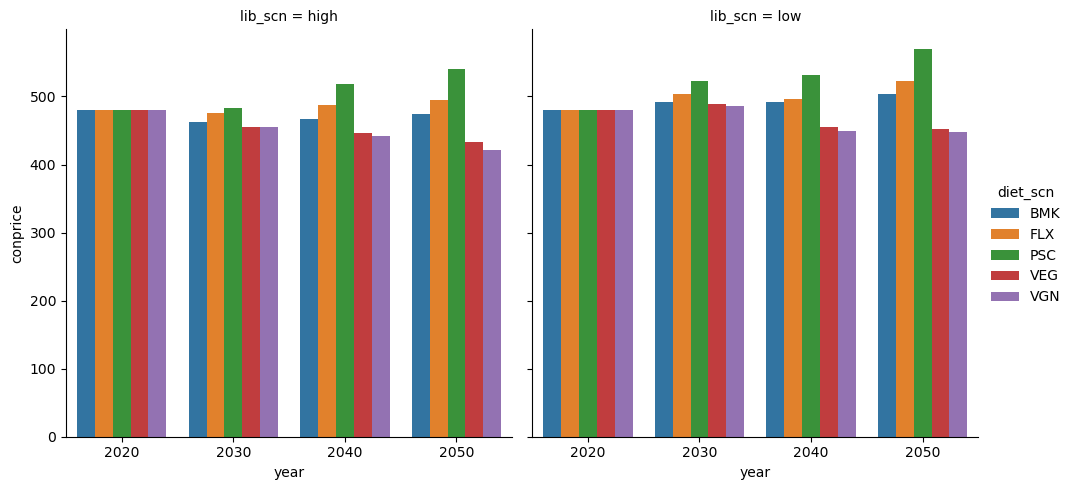

In [139]:
g = sns.catplot(x='year', y='conprice', hue='diet_scn', data=df[df['RCP']==2.6], kind='bar', col='lib_scn',
            hue_order=['BMK', 'FLX', 'PSC', 'VEG', 'VGN']) # 
plt.ylabel('Global consumer price (USD/t)')
for ax in g.axes.flat:
    ax.set_ylim(0,)

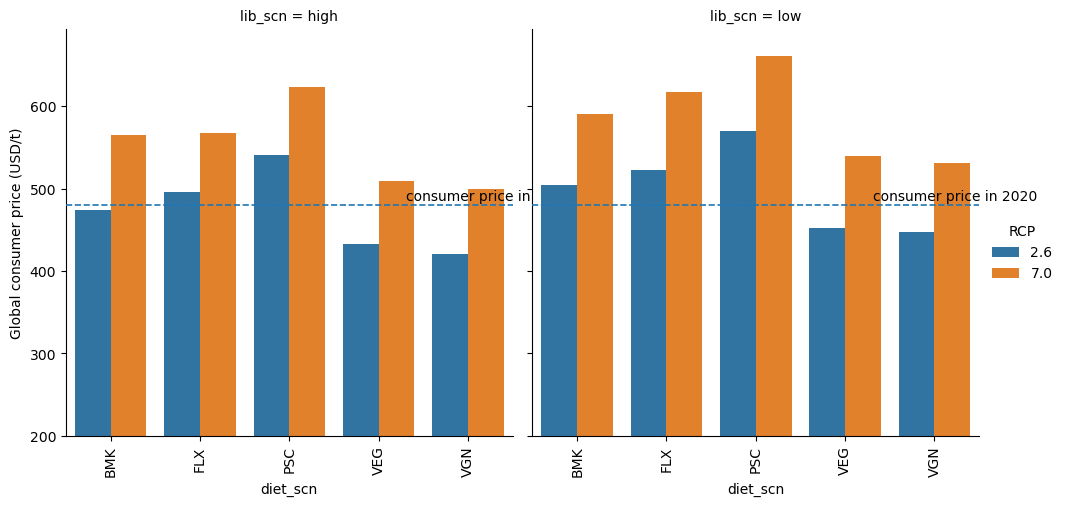

In [143]:
# consumer price
df['RCP'] = df['RCP'].astype(str)
g = sns.catplot(x='diet_scn', y='conprice', hue='RCP', data=df[df['year']==2050], kind='bar',
                col='lib_scn', hue_order=['2.6', '7.0'])
g.set_ylabels('Global consumer price (USD/t)')
g.set_xticklabels(rotation=90)

for ax in g.axes.flat:
    ax.axhline(df[(df['year']==2020) & (df['diet_scn']=='BMK') & (df['RCP']=='2.6')]['conprice'].values[0], 
               linestyle='--', linewidth=1.2, zorder=10)
    ax.text(1.13, df[(df['year']==2020) & (df['diet_scn']=='BMK') & (df['RCP']=='2.6')]['conprice'].values[0]+10, 'consumer price in 2020',
            va='center', ha='right',
            transform=ax.get_yaxis_transform())
    ax.set_ylim(200,)
    
plt.show()

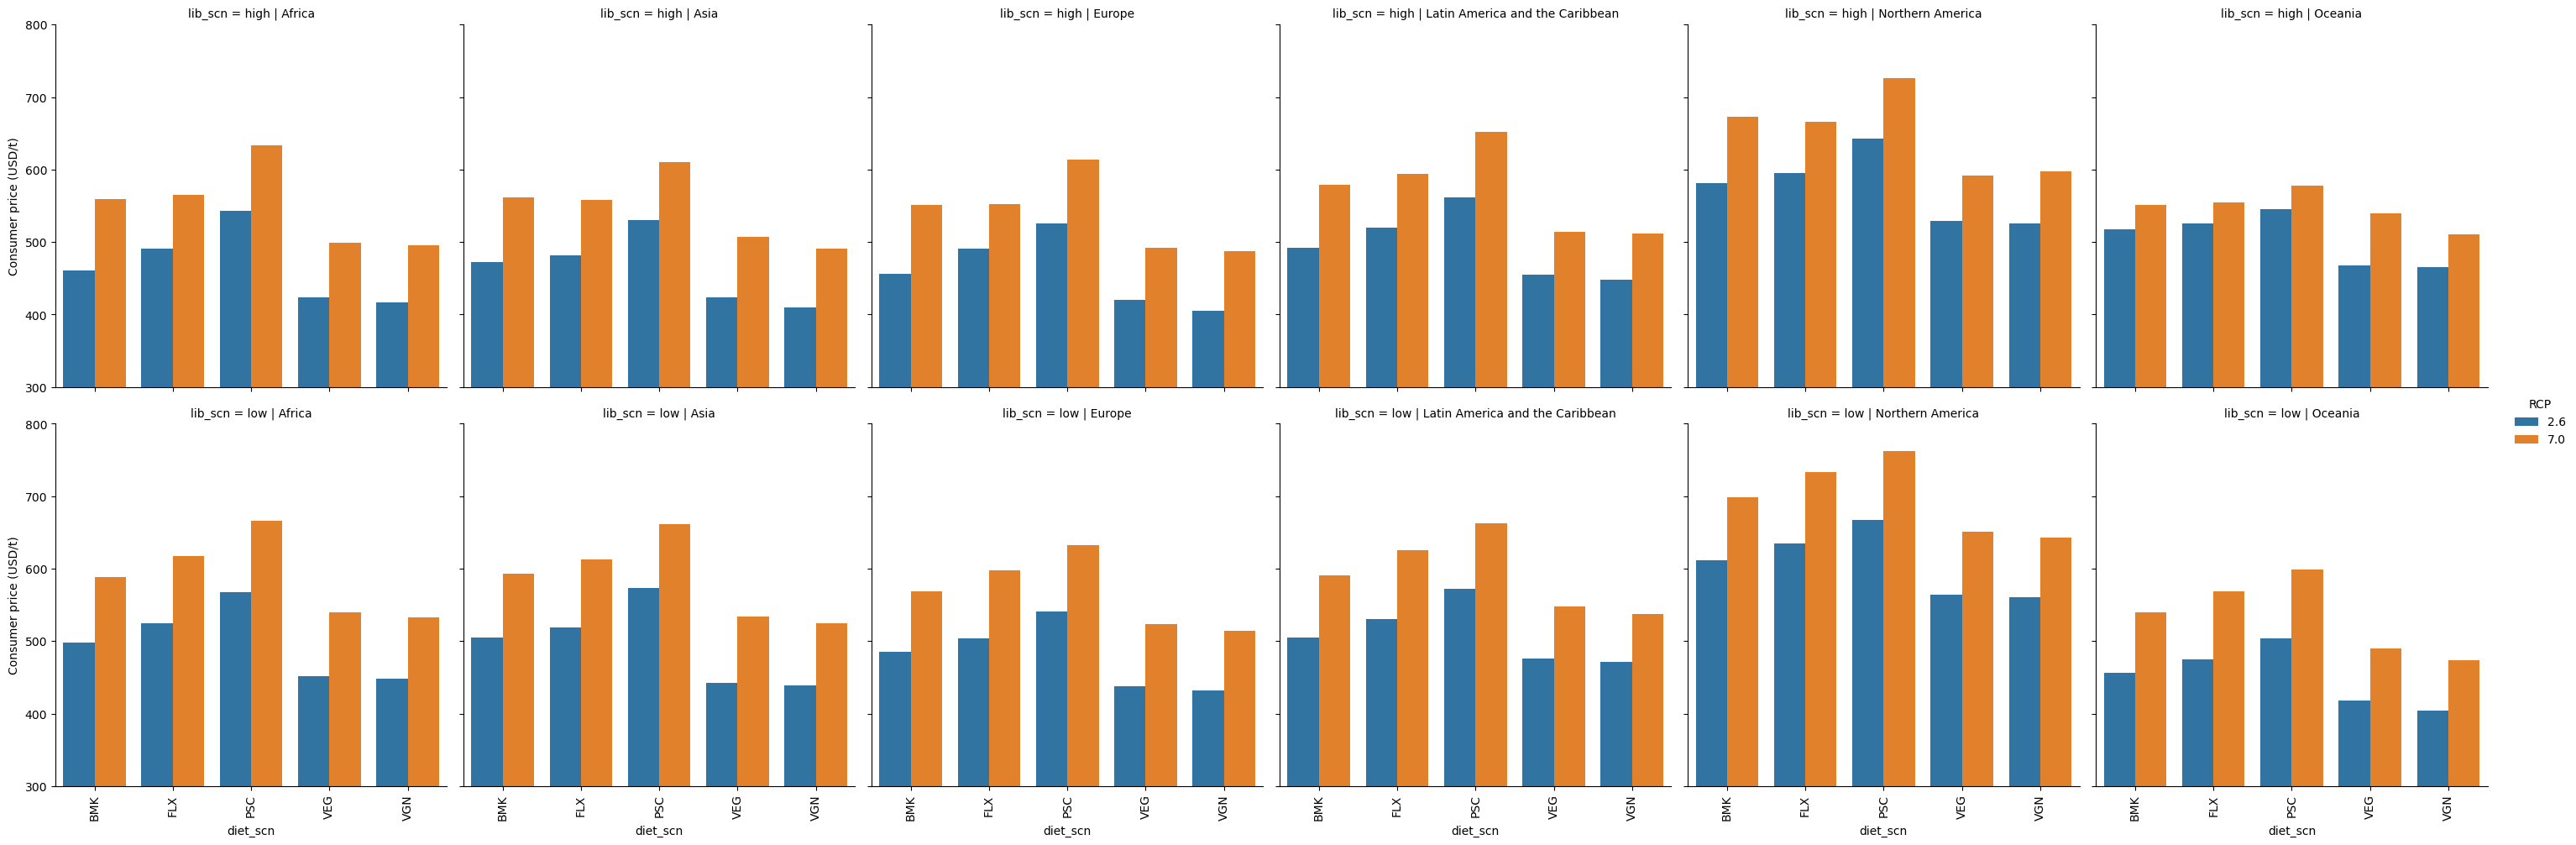

In [168]:
df = country_output_all[(country_output_all['kcal_scn']=='2500kcal') 
    & (country_output_all['year'].isin([2020, 2030, 2040, 2050]))].copy()
df = df.merge(regions.rename(columns={'Abbreviation': 'abbreviation'}))
df['total_conprice'] = df['conprice'] * df['demand']
df = df.groupby(['Region Name', 'year', 'diet_scn', 'RCP', 'lib_scn'])[['supply', 'demand', 'dom_supply', 'import', 'export', 'total_conprice']].sum().reset_index()
df['conprice'] = df['total_conprice'] / df['demand']
df['demand'] = df['demand'] / 1000
df['supply'] = df['supply'] / 1000
df['dom_supply'] = df['dom_supply'] / 1000
df['import'] = df['import'] / 1000
df['export'] = df['export'] / 1000
df['fraction_trade'] = df['import'] / df['demand']

# consumer price
df['RCP'] = df['RCP'].astype(str)
g = sns.catplot(x='diet_scn', y='conprice', hue='RCP', data=df[df['year']==2050], kind='bar',
            hue_order=['2.6', '7.0'], col='Region Name', row='lib_scn')
g.set_ylabels('Consumer price (USD/t)')

g.set_titles(col_template="{col_name}")  
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylim(300,)



In [255]:
df = country_output_all[(country_output_all['abbreviation']=='EGY') & (country_output_all['year'].isin([2020, 2030, 2040, 2050]))
                        & (country_output_all['RCP']==7) & (country_output_all['diet_scn']=='BMK')
                        & (country_output_all['lib_scn']=='low')].copy()
df['import_dependency'] = df['import'] / df['demand']
df1 = trade_output_all[(trade_output_all['to_abbreviation']=='EGY') & (trade_output_all['year'].isin([2020, 2030, 2040, 2050]))
                        & (trade_output_all['RCP']==7) & (trade_output_all['diet_scn']=='BMK')
                        & (trade_output_all['lib_scn']=='low')].copy()
df1 = df1.merge(df[['abbreviation', 'year', 'demand', 'import']].rename(columns={'Abbreviation': 'to_abbreviation'}))

def apply_perc_cumul(g):   
    g = g.sort_values(by=['trade'], ascending=False)
    g['perc_sup'] = g['trade'] / g['demand']
    g = g[g['from_abbreviation']!=g['to_abbreviation']]
    g['perc_sup'] = g['perc_sup'].cumsum()
    return g

df1 = df1.groupby('year').apply(lambda g: apply_perc_cumul(g)).reset_index(drop=True)
df1 = df1[df1['perc_sup']<0.8]
df1 = df1.groupby('year')[['from_abbreviation']].count().reset_index()
df1.head()

,year,from_abbreviation
0,2020,152
1,2030,152
2,2040,152
3,2050,152


In [198]:
trade_output_all = trade_output_all.merge(regions, left_on='from_abbreviation', right_on='Abbreviation').drop(
    'Abbreviation', axis=1).rename(columns={'Region Name': 'from_region'}).merge(
        regions, left_on='to_abbreviation', right_on='Abbreviation').drop('Abbreviation', axis=1).rename(
            columns={'Region Name': 'to_region'})
trade_output_all.head()

,from_abbreviation,to_abbreviation,trade,year,IMPACT_code,SSP,diet_scn,kcal_scn,RCP,lib_scn,from_region,to_region
0,AFG,AFG,4301.151200,2020,jwhea,SSP2,BMK,2500kcal,2.6,low,Asia,Asia
1,AFG,AFG,4371.422216,2025,jwhea,SSP2,BMK,2500kcal,2.6,low,Asia,Asia
2,AFG,AFG,4520.324533,2030,jwhea,SSP2,BMK,2500kcal,2.6,low,Asia,Asia
3,AFG,AFG,4627.260019,2035,jwhea,SSP2,BMK,2500kcal,2.6,low,Asia,Asia
4,AFG,AFG,4616.253351,2040,jwhea,SSP2,BMK,2500kcal,2.6,low,Asia,Asia


In [202]:
df = trade_output_all.groupby(['from_region', 'to_region', 'year', 'IMPACT_code', 'diet_scn', 'lib_scn', 'RCP'])[['trade']].sum().reset_index()
df['trade'] = df['trade']/1000 # million tonnes
df.shape

(5040, 8)

In [203]:
df[(df['diet_scn']=='BMK') & (df['RCP']==2.6) & (df['year'].isin([2020, 2030, 2040, 2050]))].sort_values(by='trade').tail()

,from_region,to_region,year,IMPACT_code,diet_scn,lib_scn,RCP,trade
1022,Asia,Asia,2030,jwhea,BMK,low,2.6,384.358288
1060,Asia,Asia,2040,jwhea,BMK,high,2.6,387.249102
1100,Asia,Asia,2050,jwhea,BMK,high,2.6,394.864890
1062,Asia,Asia,2040,jwhea,BMK,low,2.6,401.414616
1102,Asia,Asia,2050,jwhea,BMK,low,2.6,412.072332


In [204]:
df.loc[df['from_region']==df['to_region'], 'trade'] = 0

/Users/shruti/anaconda3/envs/ifpri/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


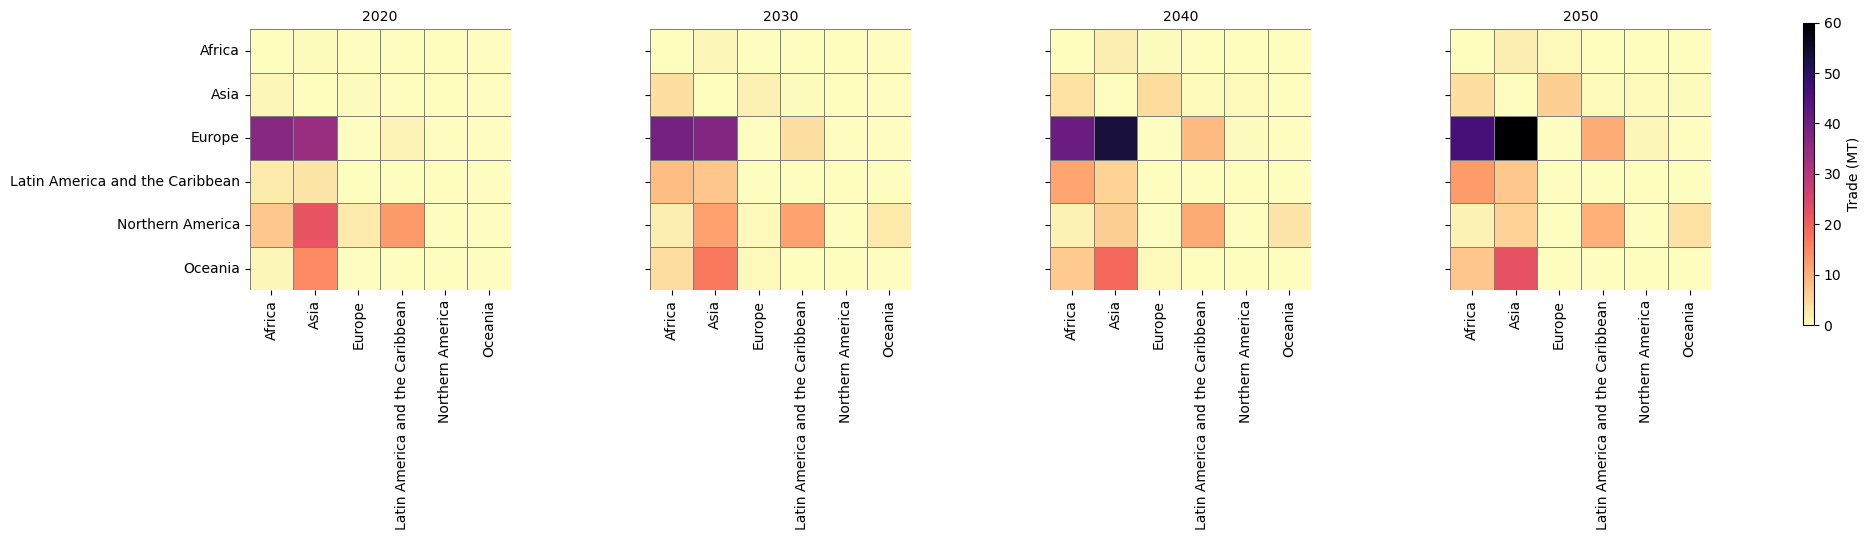

In [205]:
cmap = sns.color_palette("magma_r", as_cmap=True)

def draw_heatmap(**kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index='from_region', columns='to_region', values='trade')
    sns.heatmap(d, cmap=cmap, vmin=vmin, vmax=vmax, 
                cbar=False, square=True, linewidth=0.4, linecolor='gray')

subset = df[
    (df['diet_scn'] == 'BMK') &
    (df['RCP'] == 2.6) &
    (df['lib_scn'] == 'low') &
    (df['year'].isin([2020, 2030, 2040, 2050]))
].copy()

vmin = subset['trade'].min()
vmax = subset['trade'].max()

g = sns.FacetGrid(subset, col='year', sharey=True, height=5.5, aspect=1)
g.map_dataframe(draw_heatmap)

g.set_titles(col_template="{col_name}")  

g.set_axis_labels('', '')
for ax in g.axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=90)

# one common colorbar
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # compatibility
cbar_ax = g.fig.add_axes([0.85, 0.4, 0.005, 0.55])  # x, y, width, height
g.fig.colorbar(sm, cax=cbar_ax, label='Trade (MT)')

# leave room for the colorbar
g.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

/Users/shruti/anaconda3/envs/ifpri/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


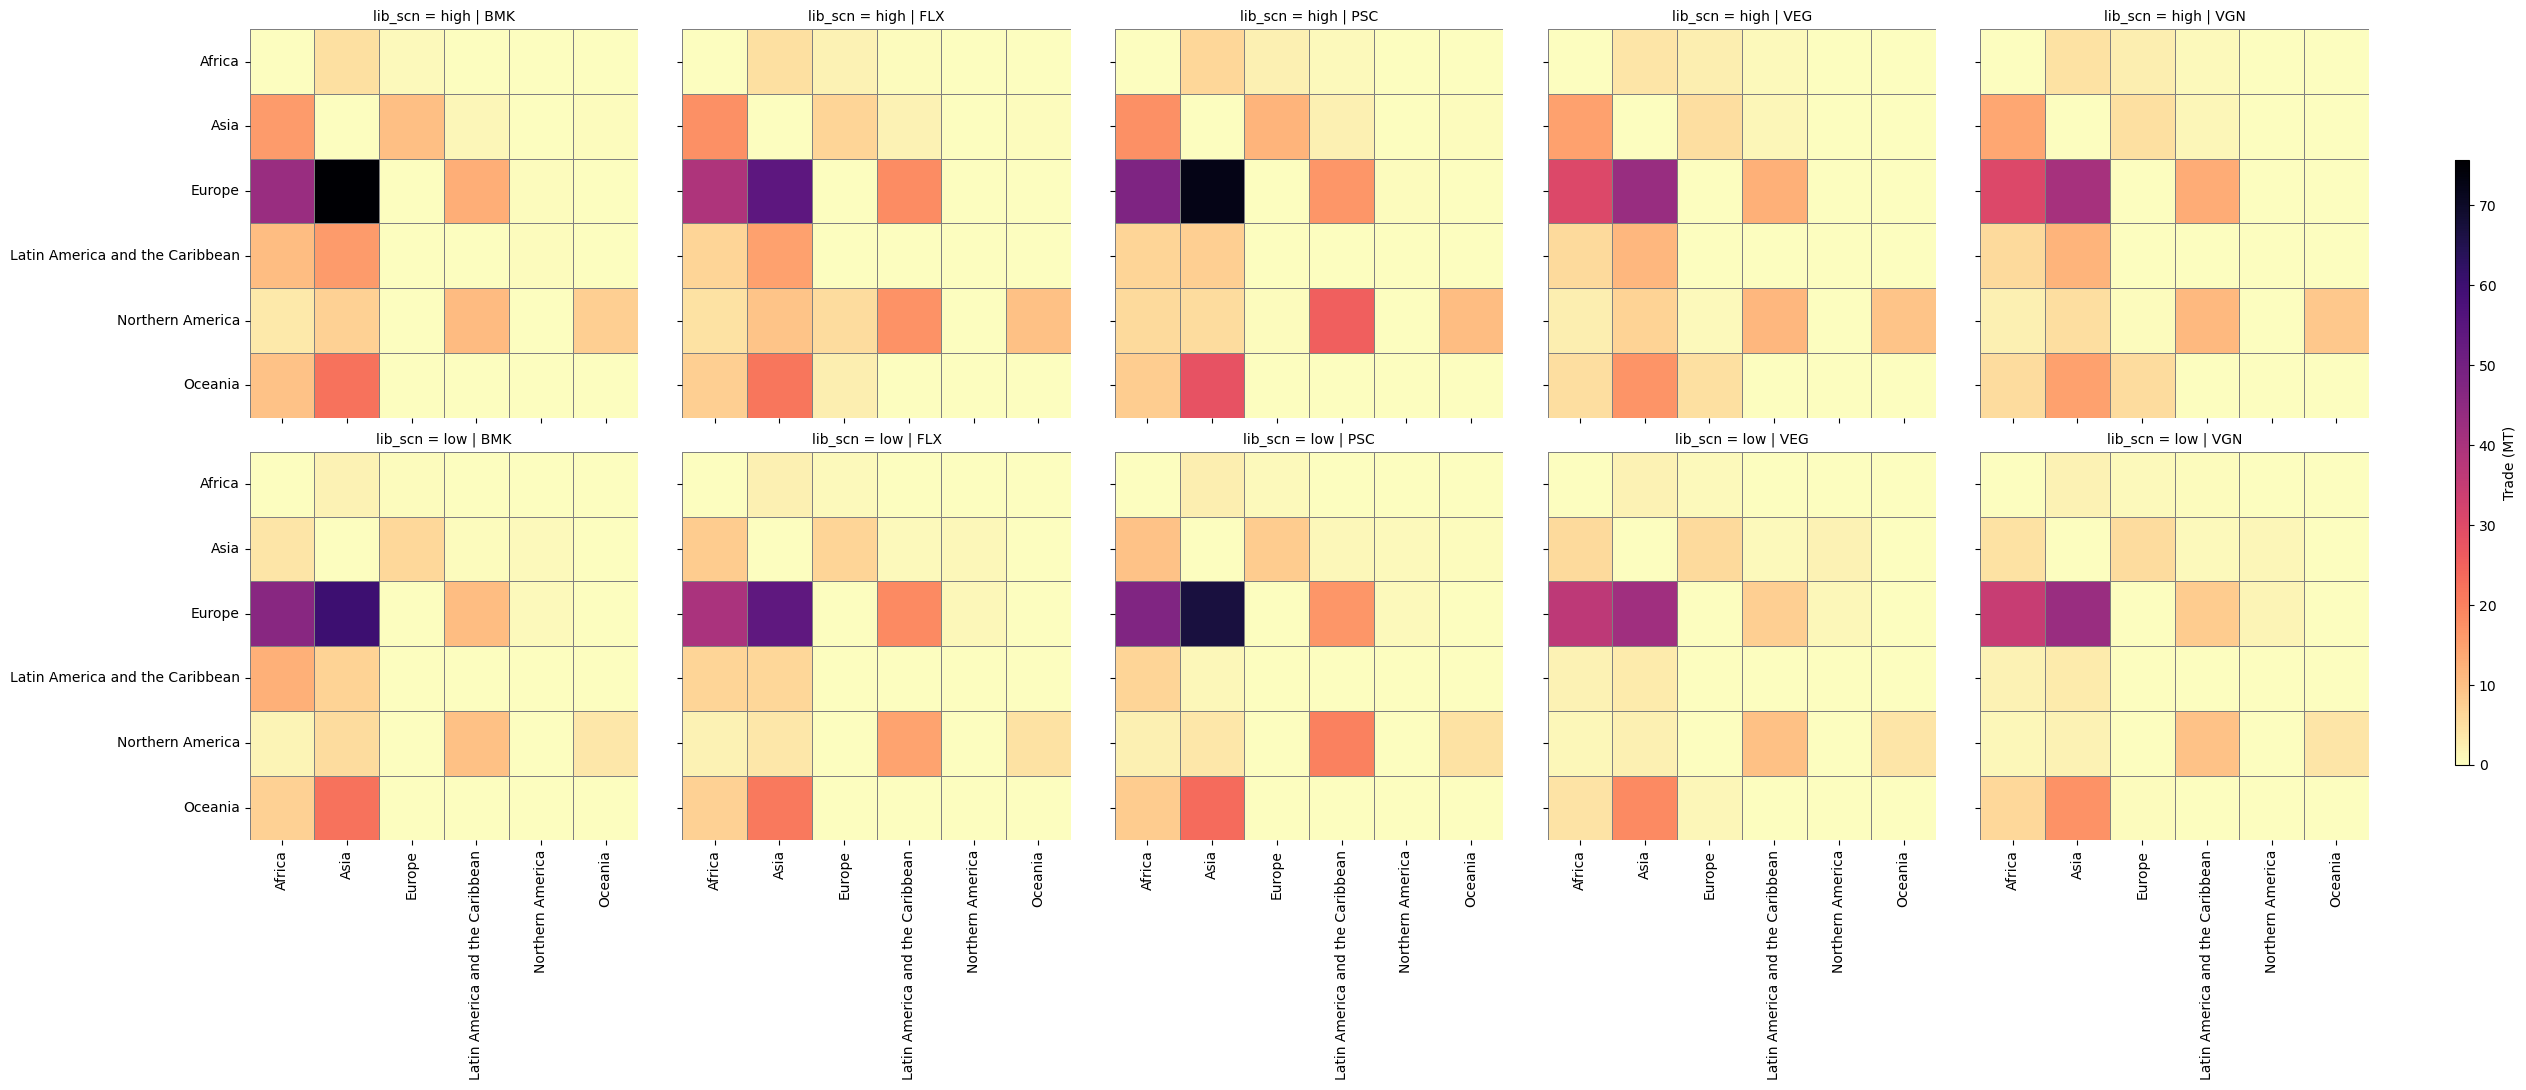

In [217]:
cmap = sns.color_palette("magma_r", as_cmap=True)

def draw_heatmap(**kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index='from_region', columns='to_region', values='trade')
    sns.heatmap(d, cmap=cmap, vmin=vmin, vmax=vmax, 
                cbar=False, square=True, linewidth=0.4, linecolor='gray')

subset = df[
    (df['year'] == 2050) &
    (df['RCP'] == 2.6)
].copy()

vmin = subset['trade'].min()
vmax = subset['trade'].max()

g = sns.FacetGrid(subset, col='diet_scn', row='lib_scn', sharey=True, sharex=True, height=5.5, aspect=1)
g.map_dataframe(draw_heatmap)

g.set_titles(col_template="{col_name}")

g.set_axis_labels('', '')
for ax in g.axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=90)

# one common colorbar
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # compatibility
cbar_ax = g.fig.add_axes([0.9, 0.3, 0.005, 0.55])  # x, y, width, height
g.fig.colorbar(sm, cax=cbar_ax, label='Trade (MT)')

# leave room for the colorbar
g.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

/Users/shruti/anaconda3/envs/ifpri/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


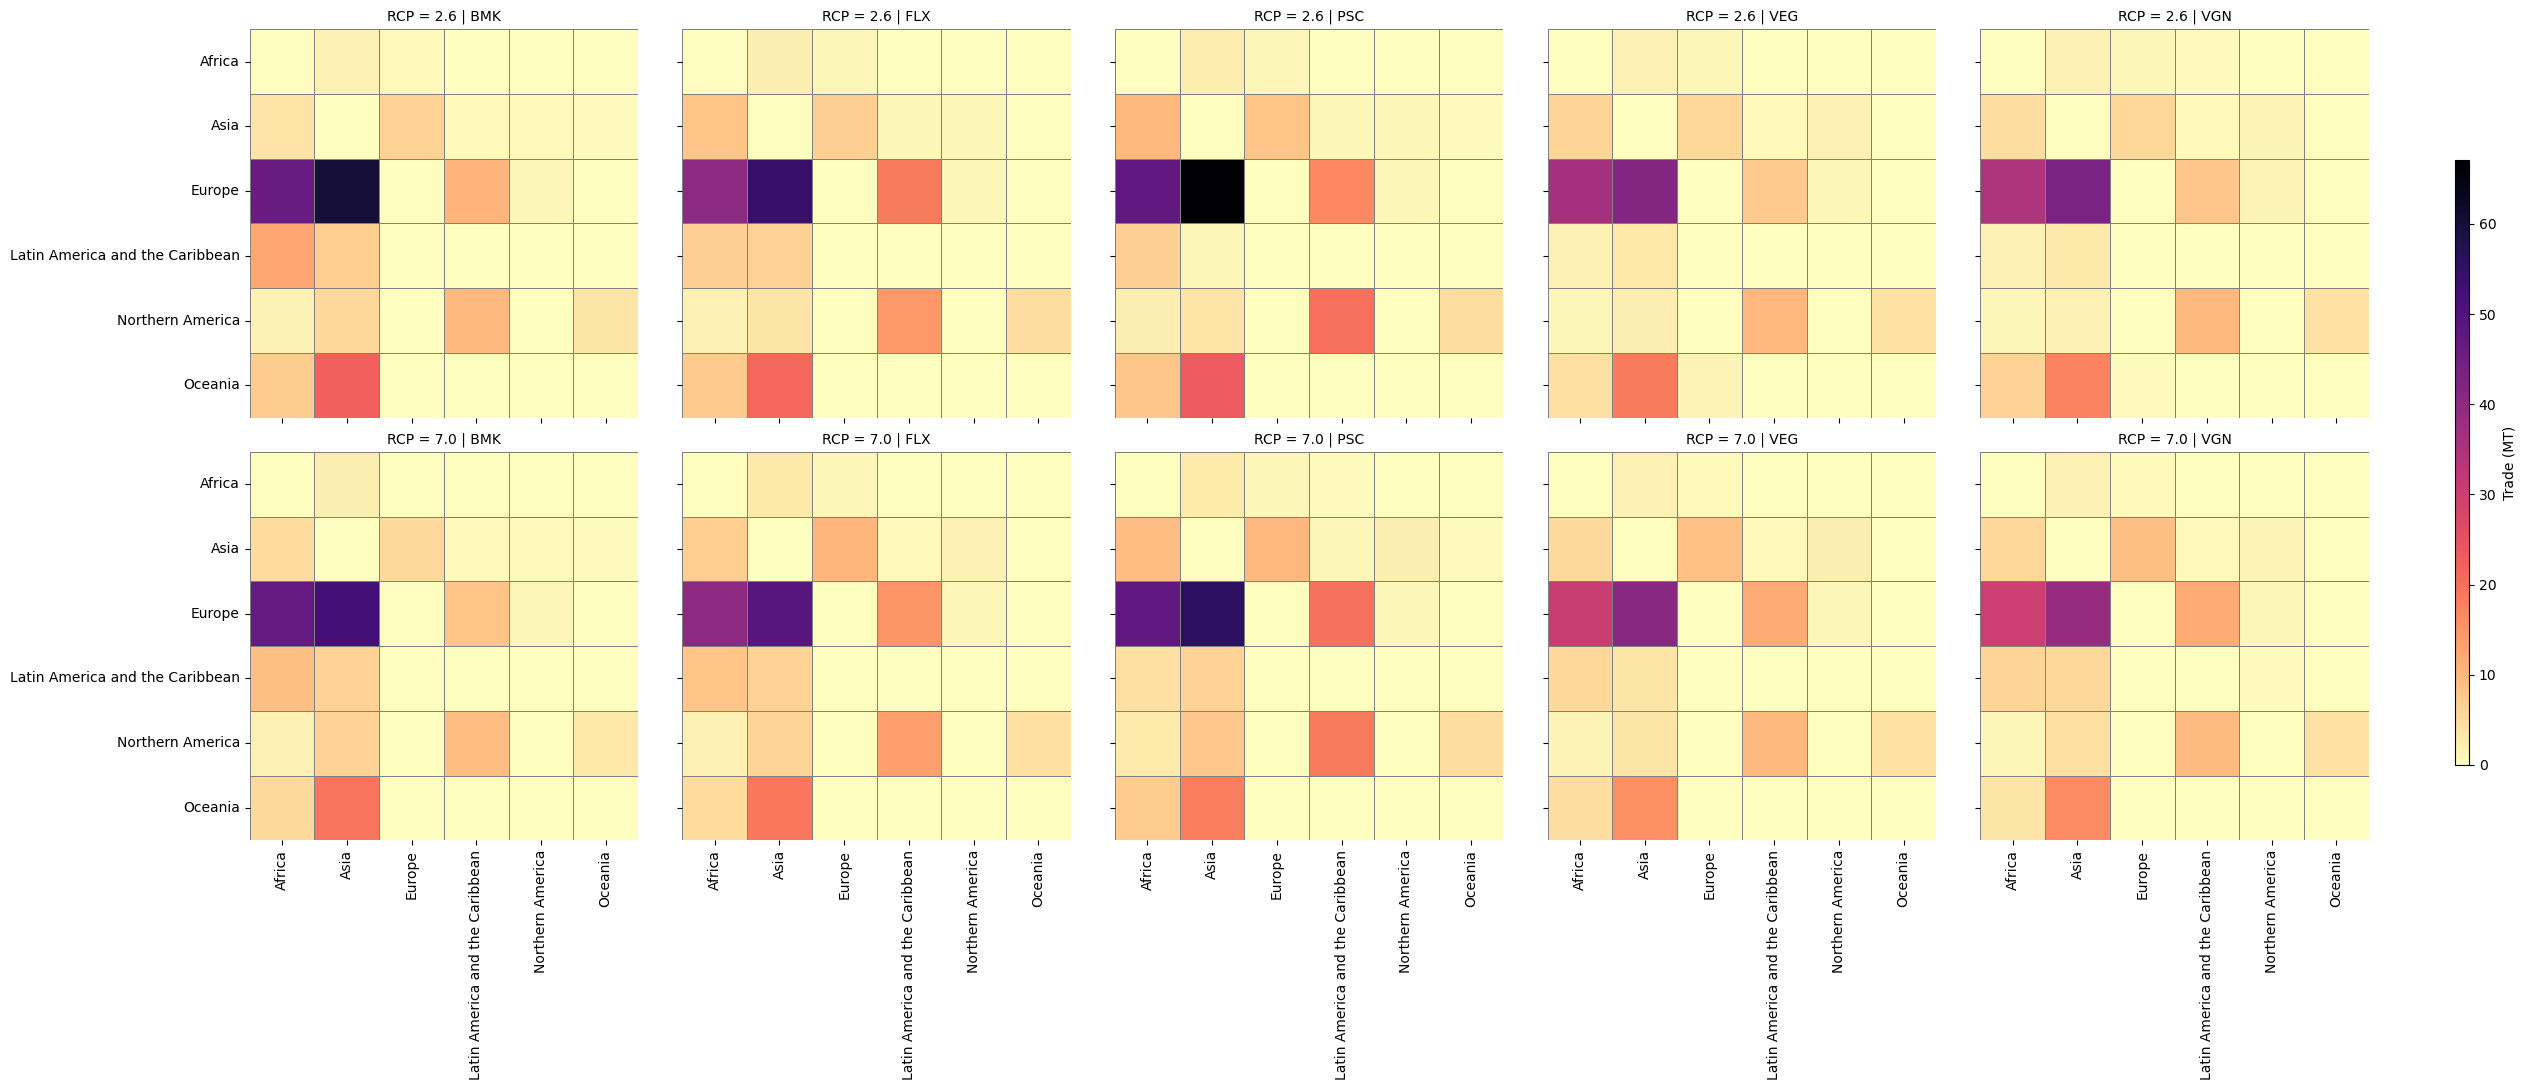

In [218]:
cmap = sns.color_palette("magma_r", as_cmap=True)

def draw_heatmap(**kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index='from_region', columns='to_region', values='trade')
    sns.heatmap(d, cmap=cmap, vmin=vmin, vmax=vmax, 
                cbar=False, square=True, linewidth=0.4, linecolor='gray')

subset = df[
    (df['year'] == 2050) &
    (df['lib_scn'] == 'low')
].copy()

vmin = subset['trade'].min()
vmax = subset['trade'].max()

g = sns.FacetGrid(subset, col='diet_scn', row='RCP', sharey=True, sharex=True, height=5.5, aspect=1)
g.map_dataframe(draw_heatmap)

g.set_titles(col_template="{col_name}")

g.set_axis_labels('', '')
for ax in g.axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=90)

# one common colorbar
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # compatibility
cbar_ax = g.fig.add_axes([0.9, 0.3, 0.005, 0.55])  # x, y, width, height
g.fig.colorbar(sm, cax=cbar_ax, label='Trade (MT)')

# leave room for the colorbar
g.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [162]:
# Read calibration data for rice and maize
def read_calibration_data(crop_code):
    data_dir = '../../OPSIS/Data/Trade_clearance_model'
    calibration_output = f'{data_dir}/Output/Calibration/'
    
    # Read calibration files
    trade = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None, index_col=[0,1]).squeeze()
    prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None, index_col=[0]).squeeze()
    conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None, index_col=[0]).squeeze()
    
    return trade, prodprice, conprice

# Compare rice vs maize
crops = ['jrice', 'jmaiz']
countries = ['CHN', 'IND']

comparison_data = []

for crop in crops:
    trade, prodprice, conprice = read_calibration_data(crop)
    
    for country in countries:
        if country in prodprice.index and country in conprice.index:
            # Get domestic trade (supply/demand)
            domestic_trade = trade.get((country, country), 0)
            
            # Calculate total supply and demand from trade matrix
            total_supply = sum([trade.get((country, j), 0) for j in trade.index.get_level_values(1).unique()])
            total_demand = sum([trade.get((i, country), 0) for i in trade.index.get_level_values(0).unique()])
            
            comparison_data.append({
                'crop': crop,
                'country': country,
                'prodprice': prodprice[country],
                'conprice': conprice[country],
                'price_gap': conprice[country] - prodprice[country],
                'domestic_trade': domestic_trade,
                'total_supply': total_supply,
                'total_demand': total_demand,
                'self_sufficiency': domestic_trade / total_demand if total_demand > 0 else 0
            })

comparison_df = pd.DataFrame(comparison_data)
print("CALIBRATION DATA COMPARISON (Rice vs Maize):")
print(comparison_df.round(2))

CALIBRATION DATA COMPARISON (Rice vs Maize):
    crop country  prodprice  conprice  price_gap  domestic_trade  \
0  jrice     IND     267.25    338.60      71.35       115826.76   
1  jmaiz     IND     241.94    348.03     106.09        28022.82   

   total_supply  total_demand  self_sufficiency  
0      131163.1     115827.56               1.0  
1       30040.9      28087.51               1.0  


In [165]:
# Now compare with the 2020 MODEL OUTPUT to see where the divergence happens
model_output_2020 = []

for crop in crops:
    try:
        # Read 2020 model output
        country_output = pd.read_csv(f'../../OPSIS/Data/Trade_clearance_model/Output/Trade_allocation_future/Country_output constant SD/country_output_SSP2_BMK_2500kcal_NoCC_2020_{crop}.csv')
        
        for country in countries:
            country_data = country_output[country_output['abbreviation'] == country]
            if len(country_data) > 0:
                row = country_data.iloc[0]
                model_output_2020.append({
                    'crop': crop,
                    'country': country,
                    'prodprice_model': row['prodprice'],
                    'conprice_model': row['conprice'],
                    'price_gap_model': row['conprice'] - row['prodprice'],
                    'demand_model': row['demand'],
                    'supply_model': row['supply'],
                    'dom_supply_model': row['dom_supply'],
                    'self_sufficiency_model': row['dom_supply'] / row['demand']
                })
    except FileNotFoundError:
        print(f"Model output file not found for {crop}")

model_output_df = pd.DataFrame(model_output_2020)
print("\nMODEL OUTPUT 2020 COMPARISON:")
print(model_output_df.round(2))

# Merge and compare calibration vs model output
if not comparison_df.empty and not model_output_df.empty:
    merged = comparison_df.merge(model_output_df, on=['crop', 'country'], suffixes=('_calib', '_model'))
    
    print("\nCALIBRATION vs MODEL OUTPUT COMPARISON:")
    print("Price gaps - Calibration vs Model:")
    for _, row in merged.iterrows():
        print(f"{row['crop']} {row['country']}: Calib gap={row['price_gap']:.1f}, Model gap={row['price_gap_model']:.1f}, Difference={row['price_gap_model']-row['price_gap']:.1f}")


MODEL OUTPUT 2020 COMPARISON:
    crop country  prodprice_model  conprice_model  price_gap_model  \
0  jrice     IND           290.48          774.63           484.15   
1  jmaiz     IND           241.56          346.55           104.99   

   demand_model  supply_model  dom_supply_model  self_sufficiency_model  
0     116330.30     129955.21         115134.16                    0.99  
1      28113.23      30000.12          28081.60                    1.00  

CALIBRATION vs MODEL OUTPUT COMPARISON:
Price gaps - Calibration vs Model:
jrice IND: Calib gap=71.3, Model gap=484.1, Difference=412.8
jmaiz IND: Calib gap=106.1, Model gap=105.0, Difference=-1.1


In [167]:
# Let's also check the elasticity values and curve parameters
def read_country_data(crop_code):
    country_file = f'../../OPSIS/Data/Trade_clearance_model/Input/Country_data/country_information_{crop_code}.csv'
    return pd.read_csv(country_file)

print("\nELASTICITY COMPARISON:")
for crop in crops:
    try:
        country_data = read_country_data(crop)
        for country in countries:
            country_row = country_data[country_data['abbreviation'] == country]
            if len(country_row) > 0:
                row = country_row.iloc[0]
                print(f"{crop} {country}: Ed_raw={row['demand_elas']:.3f}, Ed_processed={row['demand_elas']*-1:.3f}, Es={row['supply_elas']:.3f}")
    except FileNotFoundError:
        print(f"Country data file not found for {crop}")

# Calculate what the demand/supply curve parameters (A,B,C,D) would be
print("\nCURVE PARAMETERS (A,B,C,D) COMPARISON:")
error_scale = 100
error = 0.001

for crop in crops:
    try:
        country_data = read_country_data(crop)
        trade, prodprice, conprice = read_calibration_data(crop)
        
        for country in countries:
            country_row = country_data[country_data['abbreviation'] == country]
            if len(country_row) > 0 and country in prodprice.index:
                row = country_row.iloc[0]
                
                # Calculate demand and supply from trade data (same as get_calibrated_demand_supply_2020)
                demand03 = sum([trade.get((i, country), 0) for i in trade.index.get_level_values(0).unique()])
                supply03 = sum([trade.get((country, j), 0) for j in trade.index.get_level_values(1).unique()])
                demand03 += (error/error_scale) * len(trade.index.get_level_values(1).unique())
                supply03 += (error/error_scale) * len(trade.index.get_level_values(0).unique())
                
                # Calculate curve parameters - USE THE PROCESSED ELASTICITY (positive)
                Ed = row['demand_elas'] * -1  # Make positive like in functions_general.py
                Es = row['supply_elas']
                prodprice03 = prodprice[country]
                conprice03 = conprice[country]
                
                if demand03 > 1:
                    B = conprice03 / (demand03 * Ed)
                    A = conprice03 + B * demand03
                else:
                    B = A = "N/A (demand03 <= 1)"
                
                if supply03 > 1:
                    D = prodprice03 / (supply03 * Es)
                    C = prodprice03 - D * supply03
                else:
                    D = C = "N/A (supply03 <= 1)"
                
                print(f"{crop} {country}:")
                print(f"  demand03={demand03:.1f}, supply03={supply03:.1f}")
                print(f"  B={B}, A={A}")
                print(f"  D={D}, C={C}")
                
                # Also show the ratios that matter for curve steepness
                if isinstance(B, float) and isinstance(D, float):
                    print(f"  B*demand03={B * demand03:.2f}, D*supply03={D * supply03:.2f}")
                print()
                
    except Exception as e:
        print(f"Error processing {crop}: {e}")


ELASTICITY COMPARISON:
jrice IND: Ed_raw=-0.232, Ed_processed=0.232, Es=0.624
jmaiz IND: Ed_raw=-0.215, Ed_processed=0.215, Es=0.871

CURVE PARAMETERS (A,B,C,D) COMPARISON:
jrice IND:
  demand03=115827.6, supply03=131163.1
  B=0.012607847723451731, A=1798.934723072959
  D=0.0032653261271801365, C=-161.0371549105692
  B*demand03=1460.34, D*supply03=428.29

jmaiz IND:
  demand03=28087.5, supply03=30040.9
  B=0.0576322891177491, A=1966.7785259602065
  D=0.009244257884716245, C=-35.76851706189177
  B*demand03=1618.75, D*supply03=277.71



SUPPLY/DEMAND BALANCE CHECK:

JRICE:
  IND:
    Total supply: 131163.1
    Total demand: 115827.6
    Balance diff: 15335.5 (13.24%)
    Domestic share: 1.000
    Price gap: 71.3
    Ed_processed: 0.232, Es: 0.624
    Demand curve slope (B): 0.012608
    Supply curve slope (D): 0.003265

JMAIZ:
  IND:
    Total supply: 30040.9
    Total demand: 28087.5
    Balance diff: 1953.4 (6.95%)
    Domestic share: 0.998
    Price gap: 106.1
    Ed_processed: 0.215, Es: 0.871
    Demand curve slope (B): 0.057632
    Supply curve slope (D): 0.009244

DIAGNOSIS: If rice shows large balance differences or very small curve slopes,
this could explain why the solver struggles to find a stable equilibrium.
